#### Program 1
Write a program that:
* Takes a an arbitrarily long sequence of floating point numbers from the user separated by comma e.g. '12.3,45.23,11.98' as input from the user.
* Checks if each number entered is indeed a number i.e. contains only numeric or decimal point characters.
* Sums the numbers in the input string and prints their total

In [27]:
n = (input("Enter a sequence of floating point numbers(e.g 12.3,45.23,11.98): "))
print(n)

n=n.split(',')
k=0
for d in n:
    f=1
    for l in d:
        if(l=='.' or l.isdigit()):
            pass
        else:
            print(d,' is not digit')
            f=-1
            break
    if f==1:
        k +=float(d)
print(k)
        

Enter a sequence of floating point numbers(e.g 12.3,45.23,11.98): 12.3,4k.23,11.98
12.3,4k.23,11.98
4k.23  is not digit
24.28


#### Program 2
Write a program that:
* Takes two vectors (lists of floating point numbers) and calculates the Cosine Similarity between them
* The formula for Cosine similarity is as follows:
   
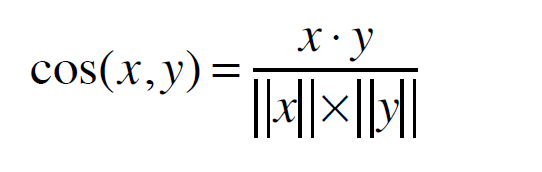

Where
  - X.Y is the dot product of two vectors given by multiplying each element of vector X by corresponding element of vector Y.
  - ||X|| x ||Y|| is the simple multiplication of lengh of X with length of Y
  where the length of a Vector is given by:
  
![](vector-length.png)
  
  - In other words, length of X is the square root of the sum of squares of each element of X.
  - Hint: Use import math in your code and look for sqrt function Python's standard math library
  




In [47]:
from math import sqrt
X = (input("Enter X sequence of floating point numbers(e.g 12.3,45.23,11.98): "))
Y = (input("Enter Y sequence of floating point numbers(e.g 12.3,45.23,11.98): "))

X=X.split(',')
Y=Y.split(',')
print(X,Y)
xy=[]
Cxy=[]
lX=0
lY=0

for z in range(0,len(X)):
    xy.append(float(X[z])*float(Y[z]))
    lX += float(X[z])*float(X[z])
    lY += float(Y[z])*float(Y[z])
    
lX = sqrt(lX)
lY = sqrt(lY)

for z in range(0,len(X)):
     Cxy.append(xy[z]/(lX*lY))
print(Cxy)

Enter X sequence of floating point numbers(e.g 12.3,45.23,11.98): 1,2,3
Enter Y sequence of floating point numbers(e.g 12.3,45.23,11.98): 1,2,3
['1', '2', '3'] ['1', '2', '3']
[0.07142857142857142, 0.2857142857142857, 0.6428571428571429]


#### Program 3
Write a function called flip that:
* Takes a number numflips as argument that specifies how many times to flip a coin
* Simulates a coin flip by randomly picking between two choices i.e. Head and Tail numflip times (use a loop)
* Returns the fraction of Heads to total numflips

Write another function that simulates several trials of the above function as follows:
* It takes two arguments:
   - flipsPerTrial that specifies the argument of the first function above
   - NumberOfTrials that specifies the total number of times the above function is to be called
* It calls the first function NumberOfTrials times and calculates the mean of the fraction of heads returned by it and returns that mean.

* So for example, if we call second function with 100 and 10, then it calls the firts one with argument 100, 10 times. Each time it get the fraction of heads returned by the first one. 
* It would need to keep track of these return values in some sort of list and finally calculate the mean of the values in that list.
* Keep calling the second function by increasing the NumberOfTrials from 10 to 100, 1000, 10000, 100000 and 1000000.
* Do you see how the mean converges to 0.5?

In [71]:
import random
def flip(numflips):
        s = [random.choice(['Head','Tail']) for i in range(numflips)]
        ss=0
        for i in s:
            if i.startswith('H'):
                ss+=1
        return ss/numflips

def severalflips(flipspertrial,numberoftrials):
    hf=0
    for i in range(numberoftrials):
        hf += flip(flipspertrial)
    return hf/numberoftrials
        
severalflips(100,10000)

0.5000729999999997

#### Program 4
Create a program that implements a data cache. The skeleton code is given below:
* The program shall use a Python dictionary as a cache which is a global variable accessible by all functions as global
* do_work function given below is an example of performing some time consuming calculations. What we want to do is to cache the results of our calculations generated by do_work into a dictionary under some appropriate key
* When the function is called next time, it should first look up in the cache by building the key from its arguments
* If the data is found in the cache, it uses that data and returns with it
* Otherwise it has to generate new data (consuming time in the process) and then cache the data against the key so that it is found in the cache next time the same key is given by the user
* We also want to save the cache to disk in a pickle file and then load it back into memory before every new run of the program (say after a reboot of the system)
* We want to initialize the cache's pickle file with an empty dictionary in the beginning when no cache exists

***Note: don't forget to close the file you open for reading/writing***

Your task is to complete the skeleton code given below. Complete the parts marked with TODO in cells below:


In [170]:
import os
from pathlib import Path
import pickle

folder = Path("E:\#FAST ISL\AI and ML\Core Python\datafiles")

# TODO: Define an empty dictionary as a global variable. This will be overwritten by
# the load_cache function below
e_cache ={}
data_cache = {}
def init_cache(cache_file):
    # TODO: create an empty dictionary and store it in a pickle file 
    # whose name is given in thje argument
    cache_file = folder/cache_file
    with open(cache_file, 'wb') as d:
        pickle.dump(e_cache,d)
def load_cache(cache_file):
    # TODO: read the current cache from the given pickle file in argument 
    #and assign it to data_cache
    cache_file = folder/cache_file
    with open(cache_file, 'rb') as d:
        data_cache = pickle.load(d)
def get_from_cache(key):
    #TODO: check if the data is in the data_cache against the given key
    # and return the value stored. Otherise return None
    return data_cache.get(key, None)
        
        

def save_cache(cache_file):
    # TODO: Save the current data_cache to the given pickle file
    cache_file = folder/cache_file
    with open(cache_file, 'wb') as d:
        pickle.dump(data_cache,d)
def show_cache():
    #TODO: print the contents of the cache on the screen
    print(data_cache.items())


In [171]:
#TODO: Write a decorator function that decorates the function it is passed
# such that in its its wrapper function it calls Python's time.time() 
# to get the current time seconds before calling the actual passed function
# and then again calls time.time() after the call to function and prints 
# the difference of both times. Then it finally returns the output of the 
# function as result
s_t = 0
import time
def decorate(func):
    #TODO: complete this function
    def wrapper_func(m,n,t):
        s_t = time.time()
        return func(m,n,t)
    return wrapper_func # replace appropriately

In [172]:
import time
@decorate
def do_work(m, n, t):
    #TODO: check if data exists in cache. Return the data immediately if it 
    # exists against the given key
    #if data exists....
    key = (n/t)+(m/t)+(n/m)
    v=get_from_cache(key)
    if(v!=None):
        return data_cache.items()
    else:
    
        # . . . do some time-consuming calculations . . .
        results = []
        for i in range(m,n,t):
            results.append(i*i)
        output = sum(results)
        #TODO: generate a key from m,n,and t and put outpout against it 
        # in data_cache
        
        data_cache[key]=output
        e_t=time.time()
        print(s_t-e_t)
        return results

#### Testing

In [173]:
init_cache('work_cache_file.pkl')

In [174]:
load_cache('work_cache_file.pkl')

In [175]:
show_cache()

dict_items([])


In [176]:
do_work(1,1000000,2)

-1555186616.9145484


[1,
 9,
 25,
 49,
 81,
 121,
 169,
 225,
 289,
 361,
 441,
 529,
 625,
 729,
 841,
 961,
 1089,
 1225,
 1369,
 1521,
 1681,
 1849,
 2025,
 2209,
 2401,
 2601,
 2809,
 3025,
 3249,
 3481,
 3721,
 3969,
 4225,
 4489,
 4761,
 5041,
 5329,
 5625,
 5929,
 6241,
 6561,
 6889,
 7225,
 7569,
 7921,
 8281,
 8649,
 9025,
 9409,
 9801,
 10201,
 10609,
 11025,
 11449,
 11881,
 12321,
 12769,
 13225,
 13689,
 14161,
 14641,
 15129,
 15625,
 16129,
 16641,
 17161,
 17689,
 18225,
 18769,
 19321,
 19881,
 20449,
 21025,
 21609,
 22201,
 22801,
 23409,
 24025,
 24649,
 25281,
 25921,
 26569,
 27225,
 27889,
 28561,
 29241,
 29929,
 30625,
 31329,
 32041,
 32761,
 33489,
 34225,
 34969,
 35721,
 36481,
 37249,
 38025,
 38809,
 39601,
 40401,
 41209,
 42025,
 42849,
 43681,
 44521,
 45369,
 46225,
 47089,
 47961,
 48841,
 49729,
 50625,
 51529,
 52441,
 53361,
 54289,
 55225,
 56169,
 57121,
 58081,
 59049,
 60025,
 61009,
 62001,
 63001,
 64009,
 65025,
 66049,
 67081,
 68121,
 69169,
 70225,
 71289,
 

In [177]:
show_cache()

dict_items([(1500000.5, 166666666666500000)])


***Call do_work some number of times***

In [178]:
do_work(10,200000,1)

-1555186637.8284037


[100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 20449,
 20736,
 21025,
 21316,
 21609,
 21904,


In [179]:
do_work(1,100000,1)

-1555186654.3262942


[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 20449

In [180]:
save_cache('work_cache_file2.pkl')

In [181]:
load_cache('work_cache_file2.pkl')

In [182]:
show_cache()

dict_items([(1500000.5, 166666666666500000), (220010.0, 2666646666699715), (200001.0, 333328333350000)])


### HackerRank Challenges
* Create an Account on www.Hackerrank.com
* Select Python Practice
* Solve at least one of the following three challenges:
  - https://www.hackerrank.com/challenges/piling-up/problem
  - https://www.hackerrank.com/challenges/validating-credit-card-number/problem
  - https://www.hackerrank.com/challenges/no-idea/problem

Ideally you should solve all three but you need to solve one to get the Certificate.

After you solve the above challenges:
 - Take a screen shot of the Success Message of the Hackerrank Web-Page stating that all your Test Cases have been passed and you have earned the required points.
 - Copy and paste your solution code to this Jupyter Notebook in three separate cells below this one. 
 
 ***Note: Your solutions should be part of your submission when you submit this notebook***

In [3]:
'''Solution Code of Piling Up Problem!'''
for t in range(int(input())):
    int(input())
    lst = list(map(int, input().split()))
    l = len(lst)
    i = 0
    while i < l - 1 and lst[i] >= lst[i+1]:
        i += 1
    while i < l - 1 and lst[i] <= lst[i+1]:
        i += 1
    print ("Yes" if i == l - 1 else "No")

2
6
4 3 2 1
Yes
1 2 3


ValueError: invalid literal for int() with base 10: '1 2 3'

In [1]:
'''Solution Code of Credit Card Problem'''
def condig(a):
    c=0
    for l in range(len(a)-2):
        if a[l]==a[l+1]:
            c+=1
            if(c==3):
                print('Invalid')
                c=5
                break
        else:
            c=0
    if c!=5:
        print("Valid")
        
for i in range(int(input())):
    f=1
    a = input()
    if a.startswith('4') or a.startswith('5') or a.startswith('6'):
        if a.isdigit() and len(a)==16:
            condig(a)
        else:
            a = a.split('-')
            for b in a:
                if len(b)!=4:
                    print('Invalid')
                    f=0
                    break
            if(f==1):
                a=''.join(a)
                if a.isdigit() and len(a)==16:
                    condig(a)
                else:
                    print('Invalid')
    else:
        print("Invalid")

50
1182387522195848
Invalid
4898285859544556
Valid
6885867822596993
Valid
6731749895254584
Valid
6624557432269847


UnboundLocalError: local variable 'c' referenced before assignment

In [ ]:
'''Solution Code of Credit Card Problem'''
import re
TESTER = re.compile(
    r"^"
    r"(?!.*(\d)(-?\1){3})"
    r"[456]"
    r"\d{3}"
    r"(?:-?\d{4}){3}"
    r"$")
for _ in range(int(input().strip())):
    print("Valid" if TESTER.search(input().strip()) else "Invalid")  

In [10]:
'''Solution Code of No Idea Problem'''
n,m = input().split(' ')

na = input().split(' ')
A = set(input().split(' '))
B = set(input().split(' '))

print(sum([(i in A) - (i in B) for i in na]))
    


    

3 2
1 5 3
3 1
5 7
1


In [11]:
'''Solution Code of No Idea Problem'''
n,m = input().split(' ')

h=0
na = input().split(' ')
ma = set(input().split(' '))
mb = set(input().split(' '))
for i in na:
    if i in ma:
        h+=1
    elif i in mb:
        h-=1
print(h)

3 2
1 5 3
3 1
5 7
1
